# Trabajo práctico integrador

**Nombre**:

## Primera Parte (Clase 1 y 2)

In [438]:
import numpy as np
import timeit
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn import metrics
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

### Primer ejercicio

Dada una matriz en formato *numpy array*, donde cada fila de la matriz representa un vector matemático, se requiere computar las normas $l_0$, $l_1$, $l_2$, $l_{\infty}$, según la siguientes definiciones:

\begin{equation}
    ||\mathbf{x}||^{p} = \bigg(\sum_{j=1}^{n}{|x_i|^p}\bigg)^{\frac{1}{p}}
\end{equation}

con los casos especiales para $p=0$ y $p=\infty$ siendo:

\begin{equation}
    \begin{array}{rcl}
        ||\mathbf{x}||_0 & = & \bigg(\sum_{j=1 \wedge x_j != 0}{|x_i|}\bigg)\\
        ||\mathbf{x}||_{\infty} & = & \max_{i}{|x_i|}\\
    \end{array}
\end{equation}

In [439]:
vector = np.random.randint(-10,10,100000)
vector

array([-1, -8, -9, ...,  6, -9,  6])

In [440]:
def norma(vector, l):
    if l == 0:
        return np.sum(vector != 0)
    if l == np.inf:
        return np.max(np.abs(vector))
    if l > 0:
        return np.power(np.sum(np.power(np.abs(vector),l)),1/l)

l = 2
print(norma(vector, l))
print(np.linalg.norm(vector, ord=l))

1830.6616290292425
1830.6616290292425


In [441]:
# Medir el tiempo de ejecución de la función norma()
t1 = timeit.timeit(lambda: norma(vector, 0), number=1000)

# Medir el tiempo de ejecución de la función np.linalg.norm()
t2 = timeit.timeit(lambda: np.linalg.norm(vector, ord=0), number=1000)

print("Tiempo de ejecución de norma():", t1)
print("Tiempo de ejecución de np.linalg.norm():", t2)

Tiempo de ejecución de norma(): 0.11445980000280542
Tiempo de ejecución de np.linalg.norm(): 0.1749669000018912


### Segundo Ejercicio

En clasificación contamos con dos arreglos, la “verdad” y la “predicción”. Cada elemento de los arreglos pueden tomar dos valores, “True” (representado por 1) y “False” (representado por 0). Entonces podemos definir 4 variables:

* True Positive (TP): El valor verdadero es 1 y el valor predicho es 1
* True Negative (TN): El valor verdadero es 0 y el valor predicho es 0
* False Positive (FP): El valor verdadero es 0 y el valor predicho es 1
* False Negative (FN): El valor verdadero es 1 y el valor predicho es 0

A partir de esto definimos:

* Precision = TP / (TP + FP)
* Recall = TP / (TP + FN)
* Accuracy = (TP + TN) / (TP + TN + FP + FN)
 
Calcular las 3 métricas con Numpy y operaciones vectorizadas.

In [442]:
truth = np.array([1,1,0,1,1,1,0,0,0,1])
prediction = np.array([1,1,1,1,0,0,1,1,0,0])

In [443]:
TP = np.sum(truth & prediction)
TN = np.sum((truth | prediction) == 0)
FP = np.sum(~truth & prediction)
FN = np.sum(truth & ~prediction)

print(TP,TN,FP,FN)
print("Precision = ", TP / (TP + FP))
print("Recall = ", TP / (TP + FN))
print("Accuracy = ", (TP + TN) / (TP + TN + FP + FN))

3 1 3 3
Precision =  0.5
Recall =  0.5
Accuracy =  0.4


### Tercer ejercicio

Crear una función que separe los datos en train-validation-test. Debe recibir de parametros:

- X: Array o Dataframe que contiene los datos de entrada del sistema.
- y: Array o Dataframe que contiene la(s) variable(s) target del problema.
- train_percentage: _float_ el porcentaje de training.
- test_percentage: _float_ el porcentaje de testing.
- val_percentage: _float_ el porcentaje de validación.
- shuffle: _bool_ determina si el split debe hacerse de manera random o no.

Hints: 

* Usar Indexing y slicing
* Usar np.random.[...]

In [444]:
def split(X_input,
          Y_input,
          train_size=0.7,
          val_size=0.15,
          test_size=0.15,
          random_state=42,
          shuffle=True):
    
    return NotImplementedError

In [445]:
def split_data(dataset, porcentaje_train=0.7, porcentaje_val=0.2, porcentaje_test=0.1, random_state = 10, shuffle = True):

    # Verificamos que los porcentajes sumen el 100%
    if not np.isclose(porcentaje_train + porcentaje_val + porcentaje_test, 1.0):
        raise ValueError("Los porcentajes deben sumar 1.0.")
    
    # Obtenemos el tamaño del conjunto de datos
    Tamaño_dataset = len(dataset)
    
    # Calculamos los indices de division de cada conjunto
    train_end = int(porcentaje_train * Tamaño_dataset)
    val_end = train_end + int(porcentaje_val * Tamaño_dataset)
    
    if shuffle == True: # Permutamos aleatoriamente los indices para obtener una muestra aleatoria (Ej: [6 5 3 9 1 7 4 8 0 2])
        np.random.seed(random_state)
        indices = np.random.permutation(Tamaño_dataset)
    else: # Los indices estarán en forma ordenada (Ej: [0 1 2 3 4 5 6 7 8 9])
        indices = np.arange(Tamaño_dataset)

    print(indices)
    
    # Obtenemos los conjuntos de datos de entrenamiento, validacion y prueba
    train_data = dataset[indices[:train_end]] # En este caso: [6 5 3 9 1 7 4], indices desde el 0 al 6
    val_data = dataset[indices[train_end:val_end]] # En este caso: [8 0], indices desde el 7 al 8
    test_data = dataset[indices[val_end:]] # En este caso: [2], indice 9
    
    return train_data[:,0], val_data[:,0], test_data[:,0],train_data[:,1], val_data[:,1], test_data[:,1]

In [446]:
# Creamos un dataset de prueba
X1, y1 = make_regression(n_samples = 10,
                       n_features = 1,
                       noise = 2,
                       n_informative = 1,
                       random_state = 42)

new_data1 = np.append(X1,y1.reshape(-1,1),axis=1)
new_data1.shape

df = pd.DataFrame(new_data1, columns=['X(Feature)', 'Y(Respuesta)'])

print(df.head(10))

   X(Feature)  Y(Respuesta)
0   -0.138264     -4.362156
1   -0.469474     -9.942904
2    0.767435     12.469066
3   -0.234137     -7.304946
4   -0.234153     -2.624603
5    0.542560      5.585855
6    0.496714      7.888743
7    1.523030     29.593225
8    1.579213     27.857940
9    0.647689      6.551497


In [447]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = split_data(new_data1, porcentaje_train=0.7, porcentaje_val=0.2, porcentaje_test=0.1, random_state=42, shuffle=True)

print(X_train, "\n", X_val, "\n", X_test, "\n", Y_train, "\n", Y_val, "\n", Y_test)

[8 1 5 0 7 2 9 4 3 6]
[ 1.57921282 -0.46947439  0.54256004 -0.1382643   1.52302986  0.76743473
  0.64768854] 
 [-0.23415337 -0.23413696] 
 [0.49671415] 
 [27.85793971 -9.94290409  5.5858549  -4.36215588 29.59322473 12.46906577
  6.55149669] 
 [-2.62460281 -7.30494645] 
 [7.88874313]


## Segunda parte (Aprendizaje Supervisado)

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [448]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

from sklearn.linear_model import LinearRegression, HuberRegressor, ElasticNetCV
from sklearn.model_selection import train_test_split

### Cuarto ejercicio

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Analice como varía el problema cuando se generan múltiples veces el dataset con un valor de _noise_ fijo. 

- Qué pasa con los coeficientes de las variables no informativas?
- La regresión se ve afectada por estas variables?
- Simule el mismo dataset 100 veces y analice los coeficientes, que se puede notar?

### Quinto ejercicio

Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generar datasets:
    - Uno normal con poco `noise` y pocos outliers
    - Uno con mucho `noise` y pocos outliers
    - Uno con poco `noise` y muchos outliers
    - Uno con mucho `noise` y muchos outliers
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Comparar y analizar resultados.

In [449]:
def imprimir(df1: pd.DataFrame, df2: pd.DataFrame):

    plt.figure(figsize=(10, 5))
    
    # Crear el scatter plot
    plt.subplot(1, 2, 1)  # 1 fila, 2 columnas, primer subplot
    plt.scatter(df1['x0'], df1['target'])

    # Agregar etiquetas y título
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Dataframe Original')

    plt.subplot(1, 2, 2)  # 1 fila, 2 columnas, segundo subplot
    plt.scatter(df2['x0'], df2['target'])

    # Agregar etiquetas y título
    plt.xlabel('Eje X')
    plt.ylabel('Eje Y')
    plt.title('Dataframe Modificado')

    # Mostrar el gráfico
    plt.show()

In [451]:
def calculo_de_errores(y_test, y_pred):

    mse = mean_squared_error(y_test, y_pred)
    print(f"El error (mse) de test es: {mse}")

    rmse_ols = mean_squared_error(
            y_true  = y_test,
            y_pred  = y_pred,
            squared = False
           )

    print(f"El error (rmse) de test es: {rmse_ols}")

    R2 = metrics.r2_score(y_test, y_pred)
    print(f"El valor (R2) de test es: {R2}\n")

In [452]:
df_poco_ruido = generate_dataset(n_samples=500,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    noise=2,
                    random_state=42,
                    output='dataframe')

df_mucho_ruido = generate_dataset(n_samples=500,
                    n_features=1,
                    n_informative=1,
                    n_targets=1,
                    noise=30,
                    random_state=42,
                    output='dataframe')

In [453]:
df1 = generate_outliers(df = df_poco_ruido,
                        cols = None,
                        extreme_outlier = False,
                        two_tailed = True,
                        percentage = 0.02)

df2 = generate_outliers(df = df_mucho_ruido,
                        cols = None,
                        extreme_outlier = False,
                        two_tailed = True,
                        percentage = 0.02)

df3 = generate_outliers(df = df_poco_ruido,
                        cols = None,
                        extreme_outlier = False,
                        two_tailed = True,
                        percentage = 0.8)

df4 = generate_outliers(df = df_mucho_ruido,
                        cols = None,
                        extreme_outlier = False,
                        two_tailed = True,
                        percentage = 0.8)



In [454]:
datasets = [df1,df2,df3,df4]

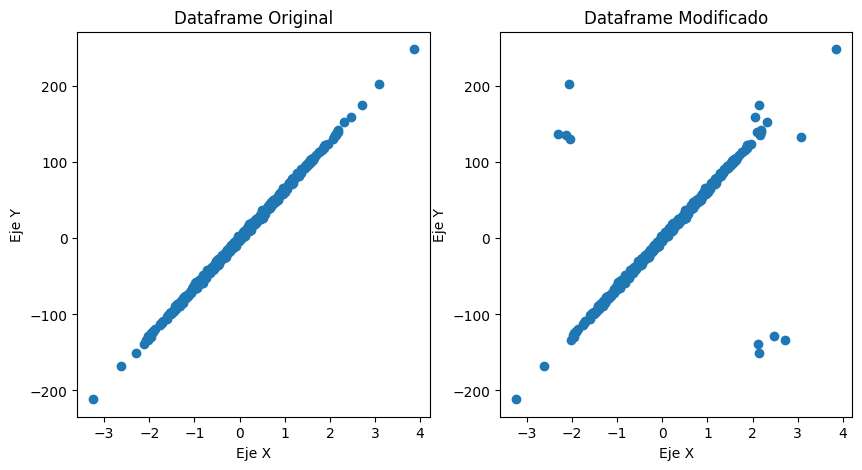

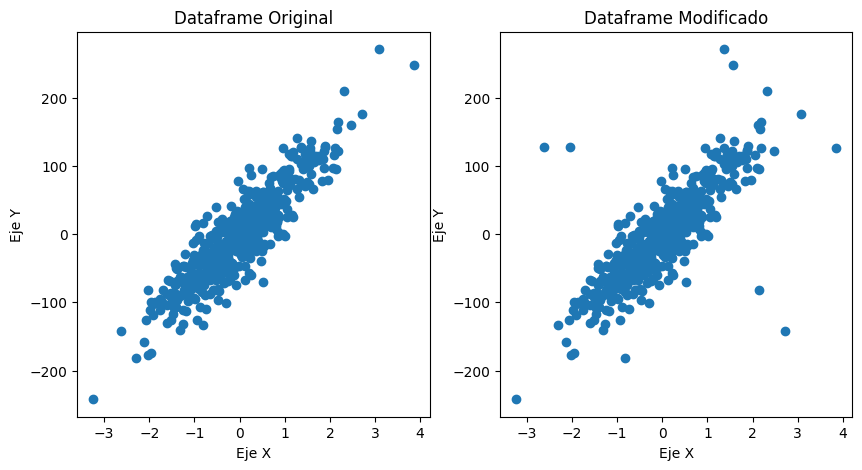

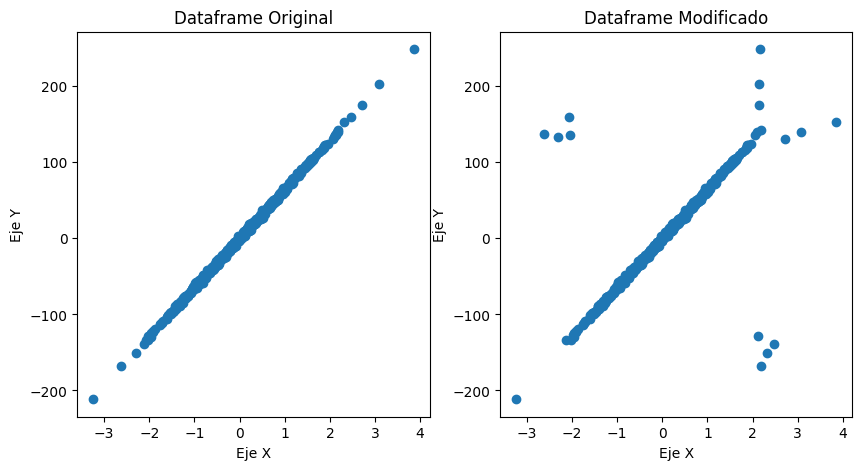

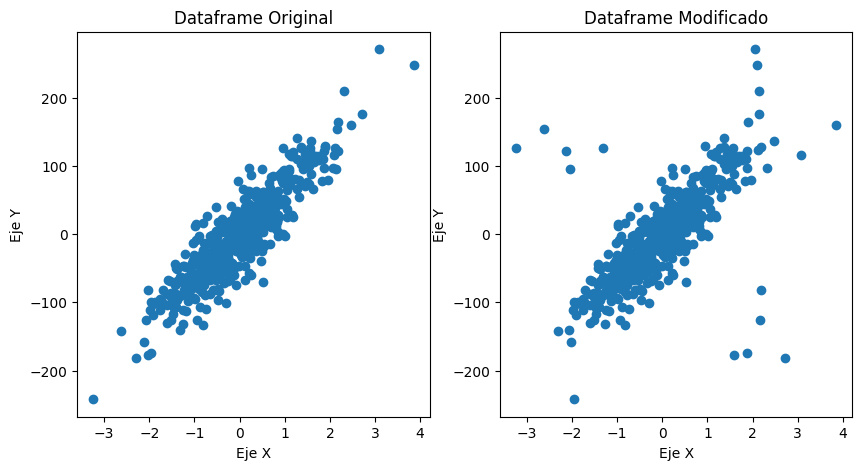

In [455]:
imprimir(df_poco_ruido,df1)
imprimir(df_mucho_ruido,df2)
imprimir(df_poco_ruido,df3)
imprimir(df_mucho_ruido,df4)

#### Modelo de Regresion Lineal

Poco Ruido y Pocos Outliers
El error (mse) de test es: 1036.105639109674
El error (rmse) de test es: 32.18859486075268
El valor (R2) de test es: 0.7067047089653506

Beta0 = 0.3754123512315095 
Beta1 = [53.34997013] 

Mucho Ruido y Pocos Outliers
El error (mse) de test es: 1038.6685113792487
El error (rmse) de test es: 32.22838052678491
El valor (R2) de test es: 0.7761791341773694

Beta0 = -0.9901969010097071 
Beta1 = [53.32041561] 

Poco Ruido y Muchos Outliers
El error (mse) de test es: 1113.7281663632943
El error (rmse) de test es: 33.372566073996985
El valor (R2) de test es: 0.6745316074625227

Beta0 = 0.11220953777058429 
Beta1 = [53.38299454] 

Mucho Ruido y Muchos Outliers
El error (mse) de test es: 1551.3719310034894
El error (rmse) de test es: 39.3874590574651
El valor (R2) de test es: 0.6642726115740338

Beta0 = -1.871500668894742 
Beta1 = [44.78885018] 



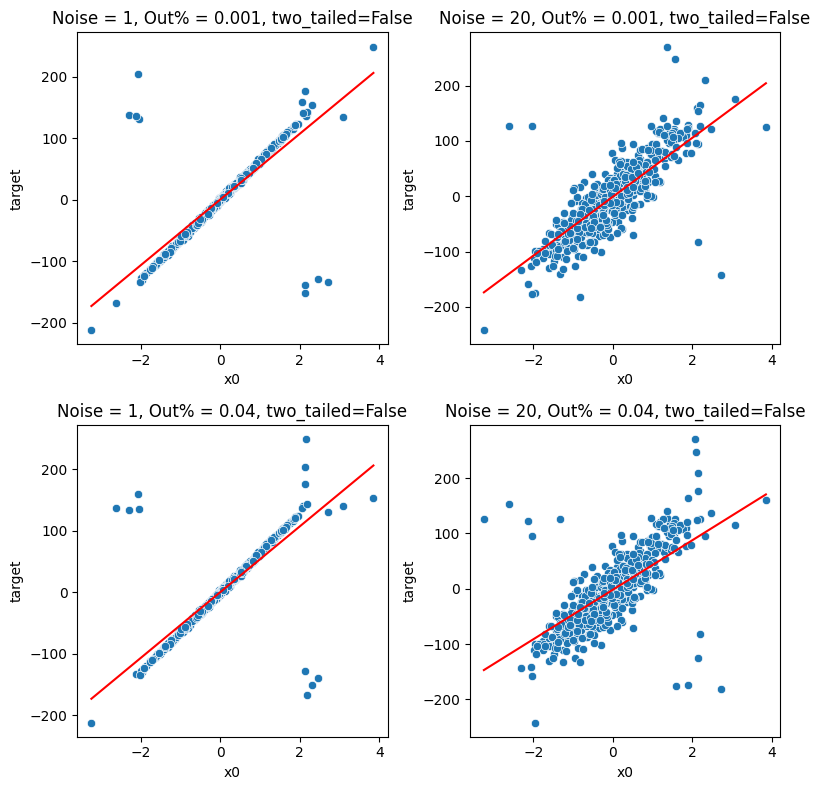

In [460]:
x = 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for dataset in datasets:

    X1 = dataset.drop('target', axis=1)  # DataFrame con las características
    y1 = dataset['target']  # Serie con la variable objetivo
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

    regression_model = LinearRegression(fit_intercept=True)
    regression_model.fit(X_train, y_train)

    y_pred = regression_model.predict(X_test)

    if x == 1:
        print("Poco Ruido y Pocos Outliers")
        ax = axes[0, 0]
    if x == 2:
        print("Mucho Ruido y Pocos Outliers")
        ax = axes[0, 1]
    if x == 3:
        print("Poco Ruido y Muchos Outliers")
        ax = axes[1, 0]
    if x == 4:
        print("Mucho Ruido y Muchos Outliers")
        ax = axes[1, 1]

    # Línea de regresión
    x_line = np.linspace(min(X1['x0']), max(X1['x0']), 100)
    y_line = regression_model.intercept_ + regression_model.coef_ * x_line
    ax.plot(x_line, y_line, color='red')

    x= x+1   
    calculo_de_errores(y_test, y_pred)
    print("Beta0 =", regression_model.intercept_, "\nBeta1 =", regression_model.coef_, "\n")

# Iterar sobre los DataFrames y asignar cada uno a una subtrama
for i, lista in enumerate(datasets):
    row = i // 2  # Fila de la subtrama
    col = i % 2   # Columna de la subtrama
    
    # Graficar el DataFrame en la subtrama correspondiente
    for column in lista.columns[:-1]:
        sns.scatterplot(data=lista, x=column, y='target', ax=axes[row, col])

axes[0, 0].set_title('Noise = 1, Out% = 0.001, two_tailed=False', fontsize=12)
axes[0, 1].set_title('Noise = 20, Out% = 0.001, two_tailed=False', fontsize=12)
axes[1, 0].set_title('Noise = 1, Out% = 0.04, two_tailed=False', fontsize=12)
axes[1, 1].set_title('Noise = 20, Out% = 0.04, two_tailed=False', fontsize=12)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Modelo Regresor Hubber

Poco Ruido y Pocos Outliers
El error (mse) de test es: 1129.3838863596802
El error (rmse) de test es: 33.60630724074991
El valor (R2) de test es: 0.6802999972817996

Beta0 = -0.06833845119912191 
Beta1 = [64.26929706] 

Mucho Ruido y Pocos Outliers
El error (mse) de test es: 934.5369854038762
El error (rmse) de test es: 30.570197667072357
El valor (R2) de test es: 0.7986182550786958

Beta0 = -1.4718927702396638 
Beta1 = [59.23222272] 

Poco Ruido y Muchos Outliers
El error (mse) de test es: 1235.641719070756
El error (rmse) de test es: 35.151695820696276
El valor (R2) de test es: 0.6389044147357767

Beta0 = -0.06694117921151797 
Beta1 = [64.27894061] 

Mucho Ruido y Muchos Outliers
El error (mse) de test es: 1314.1245380664202
El error (rmse) de test es: 36.25085568736854
El valor (R2) de test es: 0.7156145535351148

Beta0 = -1.8537960458362777 
Beta1 = [58.06143636] 



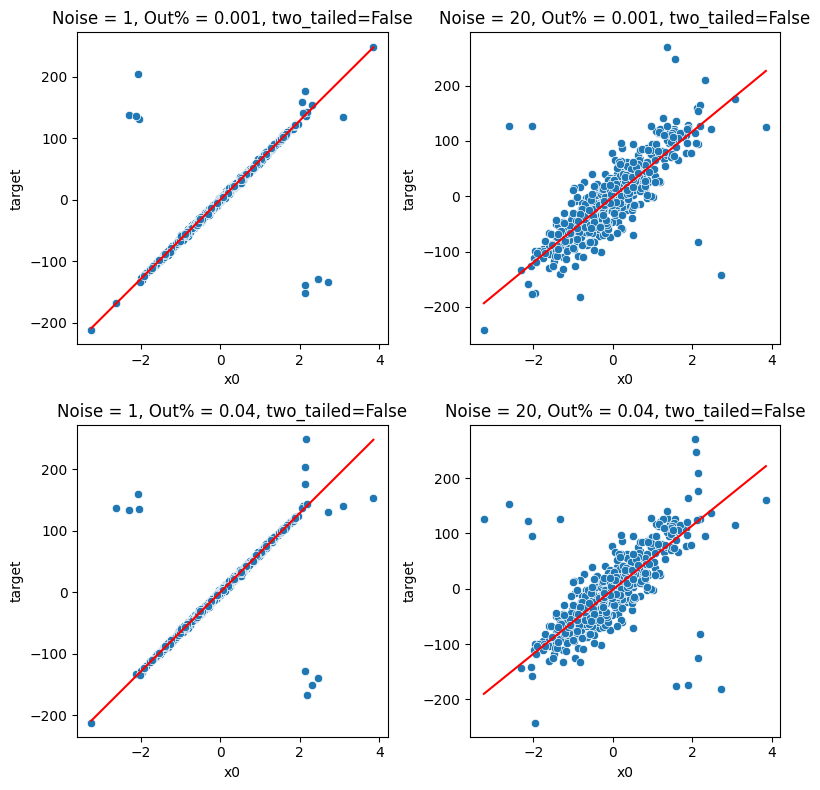

In [463]:
x = 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for dataset in datasets:

    X1 = dataset.drop('target', axis=1)  # DataFrame con las características
    y1 = dataset['target']  # Serie con la variable objetivo
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

    Hubber_model = HuberRegressor(fit_intercept=True)
    Hubber_model.fit(X_train, y_train)

    y_pred = Hubber_model.predict(X_test)

    if x == 1:
        print("Poco Ruido y Pocos Outliers")
        ax = axes[0, 0]
    if x == 2:
        print("Mucho Ruido y Pocos Outliers")
        ax = axes[0, 1]
    if x == 3:
        print("Poco Ruido y Muchos Outliers")
        ax = axes[1, 0]
    if x == 4:
        print("Mucho Ruido y Muchos Outliers")
        ax = axes[1, 1]

    # Línea de regresión
    x_line = np.linspace(min(X1['x0']), max(X1['x0']), 100)
    y_line = Hubber_model.intercept_ + Hubber_model.coef_ * x_line
    ax.plot(x_line, y_line, color='red')

    x= x+1   
    calculo_de_errores(y_test, y_pred)
    print("Beta0 =", Hubber_model.intercept_, "\nBeta1 =", Hubber_model.coef_, "\n")

# Iterar sobre los DataFrames y asignar cada uno a una subtrama
for i, lista in enumerate(datasets):
    row = i // 2  # Fila de la subtrama
    col = i % 2   # Columna de la subtrama
    
    # Graficar el DataFrame en la subtrama correspondiente
    for column in lista.columns[:-1]:
        sns.scatterplot(data=lista, x=column, y='target', ax=axes[row, col])

axes[0, 0].set_title('Noise = 1, Out% = 0.001, two_tailed=False', fontsize=12)
axes[0, 1].set_title('Noise = 20, Out% = 0.001, two_tailed=False', fontsize=12)
axes[1, 0].set_title('Noise = 1, Out% = 0.04, two_tailed=False', fontsize=12)
axes[1, 1].set_title('Noise = 20, Out% = 0.04, two_tailed=False', fontsize=12)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Modelo ElasticNet

Poco Ruido y Pocos Outliers
El error (mse) de test es: 1045.3834491141095
El error (rmse) de test es: 32.332390092817285
El valor (R2) de test es: 0.7040783956989223

Beta0 = 0.46766136379895507 
Beta1 = [50.59725796] 

Mucho Ruido y Pocos Outliers
El error (mse) de test es: 1107.4733177481862
El error (rmse) de test es: 33.278721696426175
El valor (R2) de test es: 0.7613525064655073

Beta0 = -0.8931143855691945 
Beta1 = [50.57064726] 

Poco Ruido y Muchos Outliers
El error (mse) de test es: 1114.8218408038726
El error (rmse) de test es: 33.388947884050985
El valor (R2) de test es: 0.6742119994352815

Beta0 = 0.1649844881283744 
Beta1 = [50.62699115] 

Mucho Ruido y Muchos Outliers
El error (mse) de test es: 1612.651279967021
El error (rmse) de test es: 40.15782962221715
El valor (R2) de test es: 0.6510113456062641

Beta0 = -1.8661474526410589 
Beta1 = [42.82593686] 



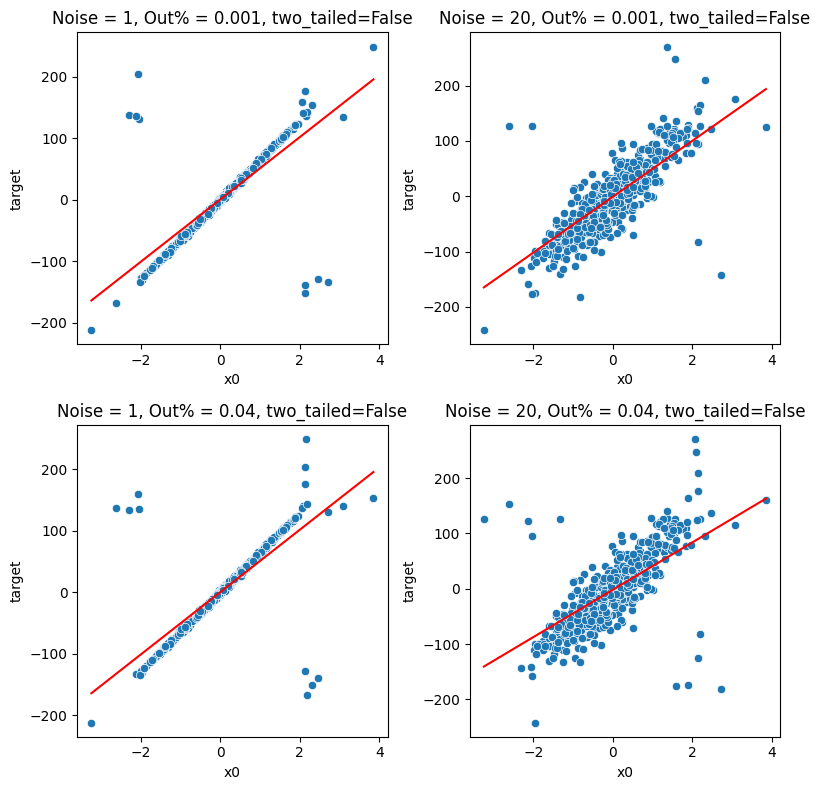

In [464]:
x = 1
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))

for dataset in datasets:

    X1 = dataset.drop('target', axis=1)  # DataFrame con las características
    y1 = dataset['target']  # Serie con la variable objetivo
    X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.3, random_state=42)

    ElasticNet_model = ElasticNetCV(fit_intercept=True)
    ElasticNet_model.fit(X_train, y_train)

    y_pred = ElasticNet_model.predict(X_test)

    if x == 1:
        print("Poco Ruido y Pocos Outliers")
        ax = axes[0, 0]
    if x == 2:
        print("Mucho Ruido y Pocos Outliers")
        ax = axes[0, 1]
    if x == 3:
        print("Poco Ruido y Muchos Outliers")
        ax = axes[1, 0]
    if x == 4:
        print("Mucho Ruido y Muchos Outliers")
        ax = axes[1, 1]

    # Línea de regresión
    x_line = np.linspace(min(X1['x0']), max(X1['x0']), 100)
    y_line = ElasticNet_model.intercept_ + ElasticNet_model.coef_ * x_line
    ax.plot(x_line, y_line, color='red')

    x= x+1   
    calculo_de_errores(y_test, y_pred)
    print("Beta0 =", ElasticNet_model.intercept_, "\nBeta1 =", ElasticNet_model.coef_, "\n")

# Iterar sobre los DataFrames y asignar cada uno a una subtrama
for i, lista in enumerate(datasets):
    row = i // 2  # Fila de la subtrama
    col = i % 2   # Columna de la subtrama
    
    # Graficar el DataFrame en la subtrama correspondiente
    for column in lista.columns[:-1]:
        sns.scatterplot(data=lista, x=column, y='target', ax=axes[row, col])

axes[0, 0].set_title('Noise = 1, Out% = 0.001, two_tailed=False', fontsize=12)
axes[0, 1].set_title('Noise = 20, Out% = 0.001, two_tailed=False', fontsize=12)
axes[1, 0].set_title('Noise = 1, Out% = 0.04, two_tailed=False', fontsize=12)
axes[1, 1].set_title('Noise = 20, Out% = 0.04, two_tailed=False', fontsize=12)

# Ajustar el espaciado entre subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

#### Comparacion de Modelos

In [410]:
# df_comparacion = pd.DataFrame({
#                     'modelo': ['LinearRegression', 'Hubber', 'Elastic-net'],
#                     'mse': [mse_ols, mse_Hubber, mse_elastic]
#                  })

# fig, ax = plt.subplots(figsize=(15, 10))
# df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
# ax.set_xlabel('rmse')
# ax.set_ylabel('modelo')
# ax.set_title('Comparación de modelos');

#### Conclusión

es importante destacar que el regresor Huber se utiliza para abordar el problema de la regresión robusta, donde se busca minimizar una función de pérdida modificada para ser menos sensible a los valores atípicos.

La función de pérdida Huber combina los beneficios de la regresión de mínimos cuadrados (que es sensible a los valores atípicos) y la regresión por valores absolutos (que es robusta a los valores atípicos). La función de pérdida Huber tiene una región lineal para los residuos pequeños y una región cuadrática para los residuos grandes, lo que le permite manejar valores atípicos de manera más efectiva.

En el regresor Huber, los coeficientes (betas) representan las ponderaciones o importancias relativas de las variables independientes en la predicción de la variable dependiente, al igual que en otros modelos de regresión. Sin embargo, la diferencia principal radica en la función de pérdida utilizada y cómo se ajustan los coeficientes para minimizar esta función.

## Tercera Parte (No supervisado)

### Sexto y Septimo Ejercicio

Para este ejercicio vamos a considerar los siguientes datasets:

* [HAR](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) (Ejercicio 3)
* [MNIST](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html) (Ejercicio 4)

1. Aplicar PCA (validar que se cumplan las condiciones), ¿Cuántas componentes necesitamos para explicar el 80% de la varianza?
2. Gráficar la variación acumulada para cada caso.
3. Utilizando [KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Agrupar el dataset transformado (ejercicio de PCA) y agrupar en clusters de $k=6$ (ej 6) y $k=10$ (ej 7). Luego en ambos casos probar con $k=2$.
4. Graficar los resultados con los distintos k's usando las primeras dos componentes principales como ejes x,y.
5. Explique. ¿Cuál fue la ganancia de usar PCA en conjunto con k-means?

In [411]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Entrenamiento de modelos de prueba
from sklearn.linear_model import LinearRegression

# Evaluación de modelos de prueba
from sklearn.metrics import mean_squared_error

# Crear datasets
from sklearn.datasets import make_regression

## Ejercicio 8

TBD

## Cuarta Parte

La ultima parte la van a poder encontrar en el archivo `template_tp_integrador_tercera_parte.ipynb`